In [125]:
# !pip install z3-solver

In [126]:
# import required libraries
from z3 import *
import networkx as nx
import matplotlib.pyplot as plt

In [127]:
def load_graph_from_file(file_path):
    graph = {}
    with open(file_path, 'r') as file:
        for line in file:
            vertex1, vertex2 = line.strip().split()
            if vertex1 not in graph:
                graph[vertex1] = set()
            if vertex2 not in graph:
                graph[vertex2] = set()
            graph[vertex1].add(vertex2)
            graph[vertex2].add(vertex1)
    return graph

# Path to the file
file_path = 'GraphR1.txt'
# file_path = 'GraphR2.txt'
# file_path = 'GraphR3.txt'
# file_path = 'GraphR4.txt'
# file_path = 'GraphR5.txt'

# Load the graph from the file
graph = load_graph_from_file(file_path)

# Display the graph
graph

{'10': {'17', '19', '24', '7', '8'},
 '17': {'10', '26', '32', '37', '5'},
 '24': {'10', '16', '25', '32', '6'},
 '19': {'10', '11', '13', '15', '36'},
 '8': {'10', '20', '3', '32', '4'},
 '7': {'0', '10', '25', '33', '36'},
 '5': {'16', '17', '21', '29', '9'},
 '26': {'13', '17', '20', '34', '6'},
 '37': {'1', '17', '20', '33', '35'},
 '32': {'17', '24', '33', '36', '8'},
 '0': {'20', '23', '30', '34', '7'},
 '20': {'0', '26', '35', '37', '8'},
 '30': {'0', '11', '13', '3', '6'},
 '34': {'0', '26', '29', '4', '6'},
 '23': {'0', '2', '21', '27', '9'},
 '35': {'15', '2', '20', '29', '37'},
 '21': {'14', '22', '23', '28', '5'},
 '28': {'12', '15', '16', '21', '31'},
 '14': {'13', '18', '21', '27', '33'},
 '22': {'1', '18', '21', '29', '31'},
 '16': {'18', '24', '28', '31', '5'},
 '12': {'11', '27', '28', '36', '4'},
 '31': {'11', '13', '16', '22', '28'},
 '15': {'1', '19', '25', '28', '35'},
 '25': {'15', '2', '24', '4', '7'},
 '33': {'14', '32', '37', '6', '7'},
 '36': {'12', '19', '32'

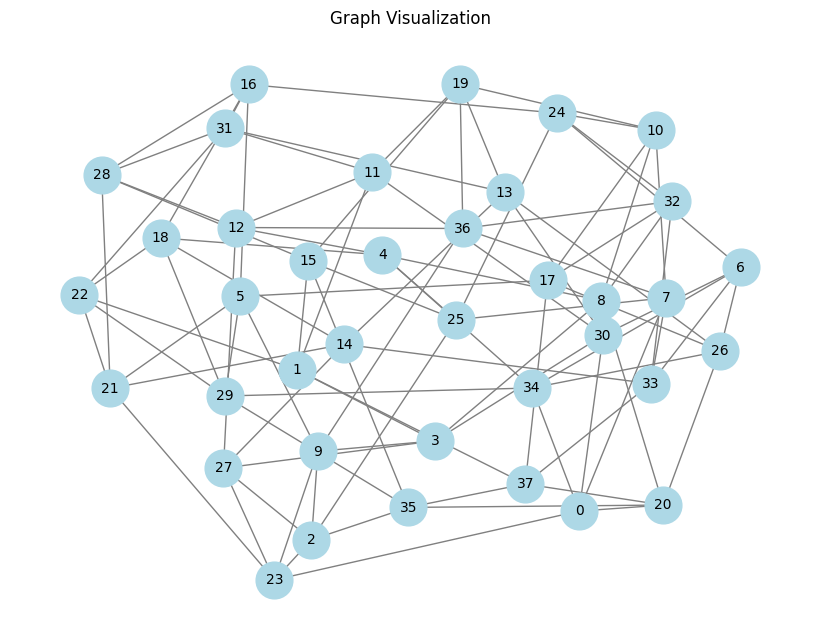

In [128]:
# Create a NetworkX graph from the dictionary
G = nx.Graph(graph)

# Plot the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=10)
plt.title("Graph Visualization")
plt.show()

In [129]:
def graph_to_dimacs(graph, num_colors=3):
    clauses = []
    vertex_color_pairs = {}
    counter = 1

    # Assign a variable number for each vertex-color pair
    for vertex in graph:
        for color in range(num_colors):
            vertex_color_pairs[(vertex, color)] = counter
            counter += 1

    # Ensure each vertex is assigned at least one color
    for vertex in graph:
        clause = [vertex_color_pairs[(vertex, color)] for color in range(num_colors)]
        clauses.append(clause)

    # Ensure no vertex is assigned more than one color
    for vertex in graph:
        for color1 in range(num_colors):
            for color2 in range(color1 + 1, num_colors):
                clauses.append([-vertex_color_pairs[(vertex, color1)], -vertex_color_pairs[(vertex, color2)]])

    # Ensure adjacent vertices do not share a color
    for vertex, neighbors in graph.items():
        for neighbor in neighbors:
            for color in range(num_colors):
                clauses.append([-vertex_color_pairs[(vertex, color)], -vertex_color_pairs[(neighbor, color)]])

    # Output in DIMACS format
    output = f"p cnf {counter-1} {len(clauses)}\n"
    for clause in clauses:
        output += " ".join(map(str, clause)) + " 0\n"

    # Save output to file
    output_file_path = 'dimacs' + file_path
    with open(output_file_path, 'w') as file:
        file.write(output)

    return output

# Generate DIMACS SAT instance
dimacs_output = graph_to_dimacs(graph)
print(dimacs_output)


p cnf 114 722
1 2 3 0
4 5 6 0
7 8 9 0
10 11 12 0
13 14 15 0
16 17 18 0
19 20 21 0
22 23 24 0
25 26 27 0
28 29 30 0
31 32 33 0
34 35 36 0
37 38 39 0
40 41 42 0
43 44 45 0
46 47 48 0
49 50 51 0
52 53 54 0
55 56 57 0
58 59 60 0
61 62 63 0
64 65 66 0
67 68 69 0
70 71 72 0
73 74 75 0
76 77 78 0
79 80 81 0
82 83 84 0
85 86 87 0
88 89 90 0
91 92 93 0
94 95 96 0
97 98 99 0
100 101 102 0
103 104 105 0
106 107 108 0
109 110 111 0
112 113 114 0
-1 -2 0
-1 -3 0
-2 -3 0
-4 -5 0
-4 -6 0
-5 -6 0
-7 -8 0
-7 -9 0
-8 -9 0
-10 -11 0
-10 -12 0
-11 -12 0
-13 -14 0
-13 -15 0
-14 -15 0
-16 -17 0
-16 -18 0
-17 -18 0
-19 -20 0
-19 -21 0
-20 -21 0
-22 -23 0
-22 -24 0
-23 -24 0
-25 -26 0
-25 -27 0
-26 -27 0
-28 -29 0
-28 -30 0
-29 -30 0
-31 -32 0
-31 -33 0
-32 -33 0
-34 -35 0
-34 -36 0
-35 -36 0
-37 -38 0
-37 -39 0
-38 -39 0
-40 -41 0
-40 -42 0
-41 -42 0
-43 -44 0
-43 -45 0
-44 -45 0
-46 -47 0
-46 -48 0
-47 -48 0
-49 -50 0
-49 -51 0
-50 -51 0
-52 -53 0
-52 -54 0
-53 -54 0
-55 -56 0
-55 -57 0
-56 -57 0
-58 -59 0


In [130]:
def find_chromatic_number(graph):
    # Start with one color
    num_colors = 1

    while True:
        # Initialize solver
        solver = Solver()
        colors = {node: Int(f'color_{node}') for node in graph.keys()}

        # Color constraints: each node's color should be in range [0, num_colors-1]
        for color in colors.values():
            solver.add(0 <= color, color < num_colors)

        # Adjacency constraints: adjacent nodes must have different colors
        for node, neighbors in graph.items():
            for neighbor in neighbors:
                if node in graph and neighbor in graph[node]:  # Check if neighbor exists to avoid KeyError
                    solver.add(colors[node] != colors[neighbor])

        # Check if it is possible to color the graph with num_colors colors
        if solver.check() == sat:
            return num_colors
        else:
            num_colors += 1

# Find the chromatic number
chromatic_number = find_chromatic_number(graph)
print(f'Chromatic Number: {chromatic_number}')

Chromatic Number: 4


In [131]:
def is_clique_of_size_n_possible(graph, n):
    # Initialize solver
    solver = Solver()

    # Create a variable for each vertex indicating if it is in the clique (1) or not (0)
    in_clique = {v: Bool(f"in_clique_{v}") for v in graph}

    # Constraint: Exactly n vertices are in the clique
    solver.add(Sum([If(in_clique[v], 1, 0) for v in graph]) == n)

    # Constraint: If two vertices are in the clique, they must be connected
    for v1 in graph:
        for v2 in graph:
            if v1 != v2:
                # If v1 and v2 are in the clique, they must be adjacent
                solver.add(Implies(And(in_clique[v1], in_clique[v2]), Or(v2 in graph[v1], v1 in graph[v2])))

    # Check if there exists a solution
    if solver.check() == sat:
        return True
    else:
        return False

def find_clique_number(graph):
    # Start with the trivial case
    n = 1
    while is_clique_of_size_n_possible(graph, n):
        n += 1
    # The actual clique number is n - 1, because n is the first failure
    return n - 1

# Find the clique number
clique_number = find_clique_number(graph)
print(f"Clique Number: {clique_number}")

Clique Number: 3


In [132]:
def find_independence_number(graph):
    solver = Optimize()

    # Create a variable for each vertex indicating whether it is in the independent set
    vars = {v: Bool(f"v{v}") for v in graph}

    # Add constraints: for every edge (u, v), at least one of u or v should not be in the set
    for u in graph:
        for v in graph[u]:
            if u != v:  # Ensure no self-loops
                solver.add(Or(Not(vars[u]), Not(vars[v])))

    # Maximize the number of vertices in the independent set
    solver.maximize(Sum([If(vars[v], 1, 0) for v in graph]))

    # Solve the problem
    if solver.check() == sat:
        model = solver.model()
        independent_set = [v for v in vars if model[vars[v]]]
        return len(independent_set), independent_set
    else:
        return 0, []

independence_number, independent_set = find_independence_number(graph)
print(f"Independence Number: {independence_number}")
print(f"Independent Set: {independent_set}")

Independence Number: 14
Independent Set: ['17', '24', '19', '8', '7', '30', '34', '35', '21', '12', '31', '18', '1', '9']


In [133]:
def acyclic_2_colouring(graph):
    solver = Solver()

    # Assign a Boolean variable for each vertex's color
    colors = {node: Bool(f'color_{node}') for node in graph}

    # Add constraints for adjacent nodes to have different colors
    for node, neighbours in graph.items():
        for neighbour in neighbours:
            solver.add(colors[node] != colors[neighbour])

    # Check for satisfiability, which implies an acyclic 2-colouring is possible
    if solver.check() == sat:
        return True, {node: solver.model()[color] for node, color in colors.items()}
    else:
        return False, {}

# Solve the problem
is_possible, coloring = acyclic_2_colouring(graph)

if is_possible:
    print("The graph admits an acyclic 2-colouring.")
    for node, color in coloring.items():
        print(f"Node {node}: Color {'Blue' if color else 'Red'}")
else:
    print("The graph does not admit an acyclic 2-colouring.")

The graph does not admit an acyclic 2-colouring.


In [134]:
def acyclic_3_colouring(graph):
    solver = Solver()

    # Assign an integer variable for each vertex's color (0, 1, or 2)
    colors = {node: Int(f'color_{node}') for node in graph}

    # Color constraint: each vertex's color should be in the range [0, 2]
    for color in colors.values():
        solver.add(And(color >= 0, color <= 2))

    # Adjacency constraints: adjacent nodes must have different colors
    for node, neighbours in graph.items():
        for neighbour in neighbours:
            solver.add(colors[node] != colors[neighbour])

    # Check for satisfiability, which implies an acyclic 3-colouring is possible
    if solver.check() == sat:
        model = solver.model()
        return True, {node: model[color].as_long() for node, color in colors.items()}
    else:
        return False, {}

# Solve the problem
is_possible, coloring = acyclic_3_colouring(graph)

if is_possible:
    print("The graph admits an acyclic 3-colouring.")
    for node, color in coloring.items():
        print(f"Node {node}: Color {color}")
else:
    print("The graph does not admit an acyclic 3-colouring.")

The graph does not admit an acyclic 3-colouring.
